## Hiring Bias in LLMs

Your company - AI-Based interview scoring system (Likert Scale 0-5)

Global average 3.0/5.0 with deviation 0.9 20million people from all countries

Step1: You collect a sample of 400 Indian Candidates

The QUESTION: "ARE INDIAN CANDIDATES BEING SCORED LOWER THAN THE GLOBAL BENCHMARK?"

What is an Hypothesis: a supposition or proposed explanation made on the basis of limited evidence as a starting point for further investigation. Test is performed on the lower tail region only. Single Tail Test

```
Hypothesis

1. H0 (Null Hypothesis): Indian Average = Global Average (mu = 3.0)
2. H1 (Alternate Hypothesis to the H0): Indian Average < Global Average
```



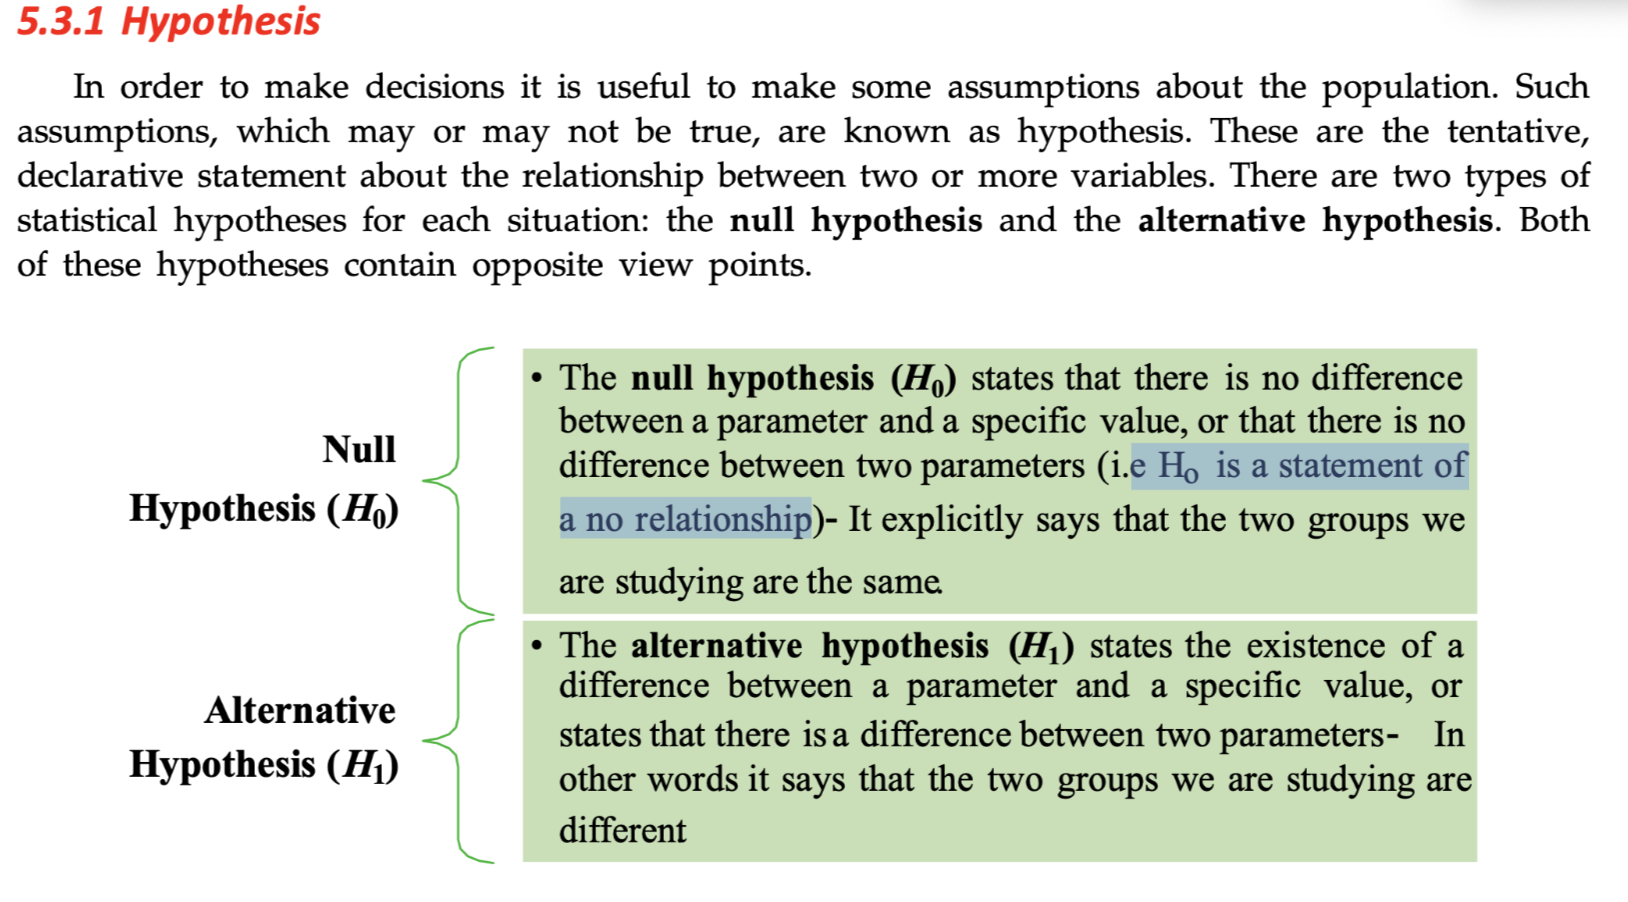

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [3]:
#Global Average
mu_global = 3.0
sigma_global = 0.9

#Indian Sample
n_indian = 400

In [4]:
df = pd.read_csv("India_Scores.csv")
df.head()

,candidates,India_Scores
0,Candidate1,3
1,Candidate2,3
2,Candidate3,3
3,Candidate4,4
4,Candidate5,3


In [5]:
xbar_india = df['India_Scores'].mean()
xbar_india

np.float64(2.8575)

In [6]:
se = sigma_global / math.sqrt(n_indian)

In [7]:
Z_statistic = (xbar_india - mu_global) / se
Z_statistic #Why statistic?

np.float64(-3.1666666666666683)

In [8]:
#For this test: 95% interval - I want to test if this value that I have got for the indian Mean is
#Extreme or not? if its extreme then it means it is lower (-ve axis)

p_value = 0.5*(1+math.erf(Z_statistic/math.sqrt(2)))

In [9]:
p_value

0.0007709847844699635

In [10]:
alpha = 0.05 #5%/100%
if p_value < alpha:
  print("Reject the Null Hypothesis")
else:
  print("Accept the Null Hypothesis")

Reject the Null Hypothesis


In [11]:
Z_critical_one_tail = norm.ppf(0.05)

In [12]:
Z_critical_one_tail

np.float64(-1.6448536269514729)

In [13]:
Z_critical_one_tail

if Z_statistic < Z_critical_one_tail:
  print("Reject the Null Hypothesis")
else:
  print("Accept the Null Hypothesis")

Reject the Null Hypothesis


##There might be a Fairness & a diversity Risk!

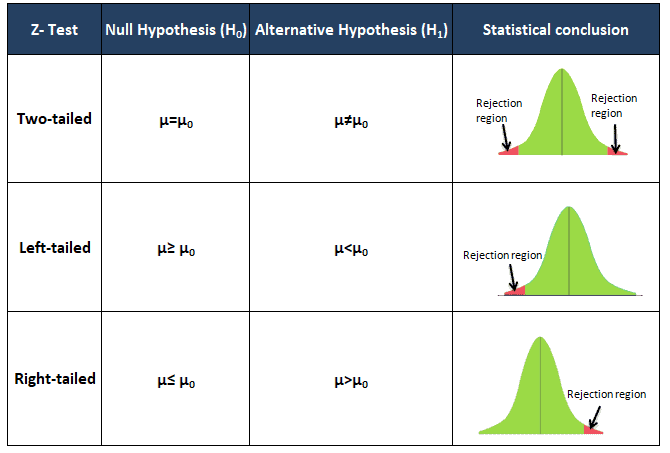

Two tail Hypothesis


```
1. H0 (Null Hypothesis): Indian Average = Global Average (mu = 3.0)
2. H1 (Alternate Hypothesis to the H0): Indian Average is not equal to Global Average
```



In [14]:
#For this test: 95% interval - I want to test if this value that I have got for the indian Mean is
#Extreme or not? if its extreme then it means it is lower (-ve axis)
Z_statistic = (xbar_india - mu_global) / se

p_two_tailed = 2*(1-norm.cdf(abs(Z_statistic))) #2* smaller region minor region itself, becuase of the assumption of normal ideal

In [15]:
p_two_tailed

np.float64(0.0015419695689400381)

In [16]:
alpha = 0.05 #5%/100%
if p_two_tailed < alpha:
  print("Reject the Null Hypothesis")
else:
  print("Accept the Null Hypothesis")

Reject the Null Hypothesis


In [17]:
z_crit_two_tail = norm.ppf(1-alpha/2) # 0.025 ---------------------- 0.025 #Percent Point Function
z_crit_two_tail #Test was conducted for a confidence of 95% and 5% level of significance

np.float64(1.959963984540054)

In [18]:
if Z_statistic > z_crit_two_tail or Z_statistic < -z_crit_two_tail:
  print("Reject the Null Hypothesis")
else:
  print("Accept the Null Hypothesis")

Reject the Null Hypothesis


In [19]:
#alpha = Level of significance = 1- level of confidence = 1-0.95 = 0.05

In [20]:
#Hypothesis Testing - Especially TEsts for Mean / Variance - Go to ChatGPT and research
#Submit the Chat as assigment document

In [21]:
#1. What will be your confidence as a level to support your decision - CL / Alpha
#2.a. What will that Z critical value below or above I quatify as Far (Previous parameters we have assumed for this test)
#2.b. What will that p below which I can say that I reject or accept.. Alpha..!
#3. Normalization of my data parameter (Z-Statistic)
#4. Decision towards Null and Alternate

In [22]:
#Single Z - Test for mean | Population SD known (we accepted this parameter

## CASE B - Population SD is not known..
- Just have sample data no published Sigma
*When to use: - You dont trust a fixed sigma for the subgroup / time. Estimate from the sample

In [23]:
xbar_india

np.float64(2.8575)

In [24]:
mu_global

3.0

In [25]:
df

,candidates,India_Scores
0,Candidate1,3
1,Candidate2,3
2,Candidate3,3
3,Candidate4,4
4,Candidate5,3
...,...,...
395,Candidate396,2
396,Candidate397,1
397,Candidate398,4
398,Candidate399,3


In [26]:
s = df['India_Scores'].std()

In [27]:
s

0.9242995044545013

In [36]:
from scipy import stats
#paramters for the test
alpha = 0.05
cl = 0.95
n = df.shape[0]
xbar = df['India_Scores'].mean()
s = np.std(df['India_Scores'].tolist(),ddof=1) #Independent pieces of information available to esstimate a parameter
se = s / math.sqrt(n)

#Compute the test statistic
t_stat = (xbar - mu_global) / se
print(t_stat)

df = n-1 #we are assuming DOF here as it adjusts the calculation to reflect that we estimated
#the mean from the data. The t-distribution itself is derive under this adjustment
#we know the mean from the population and how many variables can we find in the sample (n-1 example above)

#Pvalue one side
p_one = stats.t.cdf(t_stat, df = df)

alpha = 0.05 #5%/100%
if p_one < alpha:
  print("Reject the Null Hypothesis")
else:
  print("Accept the Null Hypothesis")

#Do a two-tail test on this.. and send "done"

-3.083416128933229
Reject the Null Hypothesis


In [29]:
Xbar = (2.4+2.8+3.1+3.3+4.5)/5

In [30]:
Xbar

3.2199999999999998

In [ ]:
(2.4+2.8+3.1+3.3+x)/5  = 3.2199999999999998 #Mean (n-1)
#The degrees of Freedom came from the fact that the sample mean is known, only 4 deviations are free to vary independently.

#CASE C: Check if the india's variance equals a known global vairance

```
Hypothesis

1. H0 (Null Hypothesis): Indian variance = Global variance (mu = 3.0)
2. H1 (Alternate Hypothesis to the H0): Global variance not equal indian variance
```

In [39]:
#parameters
sigma0 = 0.9
df = pd.read_csv("India_Scores.csv")
n = df.shape[0]
sample_var = np.var(df['India_Scores'].tolist(),ddof=1)
df_ = n-1

chi2_stat = df_ * sample_var / (sigma0**2)


#Derived distribution of the Normal = Chi Square = Square of Normals
#Start with a Normal Distribution
#Z ~ N(0,1) #0- mean | 1 sd unit from each other
#Za^2 + Zb^2 ~ Chi_2^2


In [42]:
p_two = 2*min(stats.chi2.cdf(chi2_stat,df_),1-stats.chi2.cdf(chi2_stat,df_))

In [ ]:
alpha = 0.05
if p_two < alpha:
  print("Reject the Null Hypothesis")
else:
  print("Accept the Null Hypothesis")

#CASE D: Check if the india's variance related to UK's variance

#F-Test

#Chi - Sum of Squared Standard Normals with K deg of freedom

#F - Ratio of two independent scaled - CHI - Square Tests

F = (ChiSquare_d1/ d1) / (ChiSquare_d2/ d2)

F = S1^2 / S2^2

In [43]:
df['India_Scores']

,candidates,India_Scores
0,Candidate1,3
1,Candidate2,3
2,Candidate3,3
3,Candidate4,4
4,Candidate5,3
...,...,...
395,Candidate396,2
396,Candidate397,1
397,Candidate398,4
398,Candidate399,3


In [45]:
#parameters
sigma0 = 0.9
df = pd.read_csv("India_Scores.csv")
n = df.shape[0]
sample_var_India = np.var(df['India_Scores'].tolist(),ddof=1)
df_ = n-1

rng = np.random.default_rng()
sample_uk =rng.normal(loc = 0.12,scale = 0.25, size = df.shape[0] )
sample_var_uk =  np.var(sample_uk,ddof=1)

#Test statiscit value
F_stat = sample_var_India / sample_var_uk

df1 = df.shape[0]-1
df2 = len(sample_var_uk)-1

p_one = 1-stats.f.cdf(F_stat,df1,df2)
p_two = 2*min(p_one,1-p_one)

alpha = 0.05
if p_one < alpha:
  print("Reject the Null Hypothesis")
else:
  print("Accept the Null Hypothesis")

In [48]:
np.mean(sample_uk)

np.float64(0.13676934615131683)

## CASE E: One - way Annova total variability between different groups